# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [3]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
143,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,NaN,Q
405,406,0,2,"Gale, Mr. Shadrach",male,34.0,1,0,28664,21.0000,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
91,92,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S


# Learning More About The Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Trying to understand 'Cabin Feature'

In [5]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [6]:
df.PassengerId.unique() #Understanding the feature

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [7]:
df = df.drop (columns = ['PassengerId']) #Removing passengerID

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [9]:
df.shape

(891, 11)

In [10]:
df.describe(include='all').T #For entire data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
Cabin,204,147,B96 B98,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.describe() # For numerical data only

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Checking for Null Values

In [12]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# Handling null values

In [13]:
df['Age'] = (df['Age'].fillna (df['Age'].mean())) # Using mean method since 'Age' is contineous data

In [14]:
df['Embarked'] = (df['Embarked'].fillna (df['Embarked'].mode()[0])) # Using mode method since 'Embarked' is categorical data

In [15]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [17]:
df.Cabin.unique() #Trying to understand Cabin feature

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

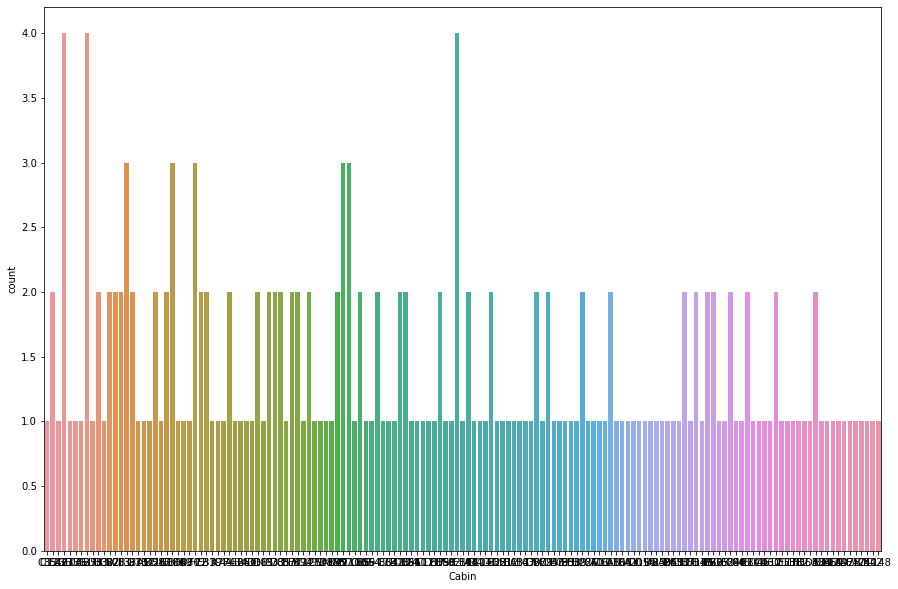

In [18]:
plt.figure(figsize = (15,10))
sns.countplot (x='Cabin', data = df)
plt.show()

# Converting 'Cabin' feature into Alphabets & Numerics

In [19]:
char_cabin = df['Cabin'].astype(str)
new_cabin = np.array([cabin[0] for cabin in char_cabin])
new_cabin = pd.Categorical(new_cabin) #Using .Categorical method



# Assigning the modified 'Cabin' feature details
df['Cabin'] = new_cabin
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,S


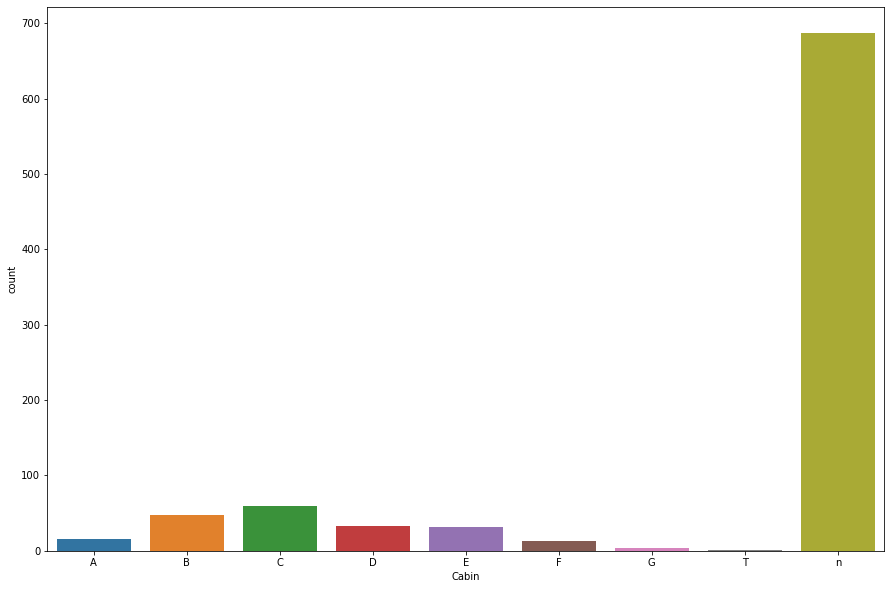

In [20]:
#Checking the unique counts of Cabin feature again
plt.figure(figsize = (15,10))
sns.countplot (x='Cabin', data = df)
plt.show()

In [21]:
df = df.drop (columns = ['Cabin']) #Removing Cabin feature

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


# Trying to get clarity on "Ticket" feature

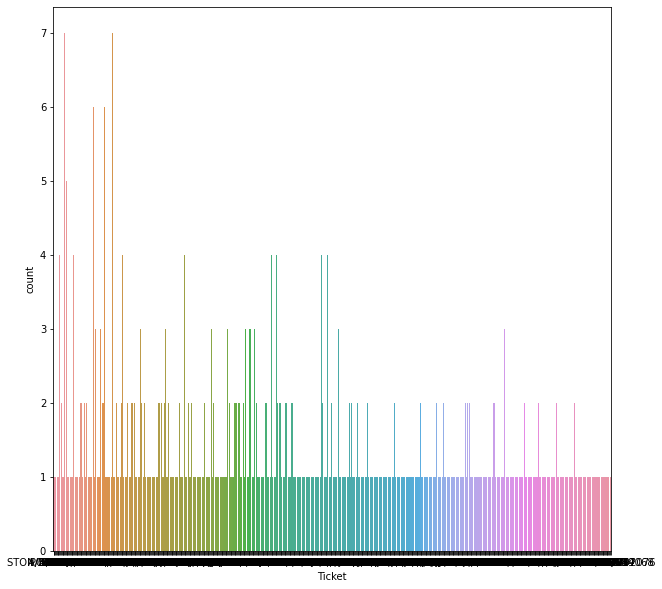

In [24]:
plt.figure(figsize = (10,10))
sns.countplot (x='Ticket', data = df)
plt.show()

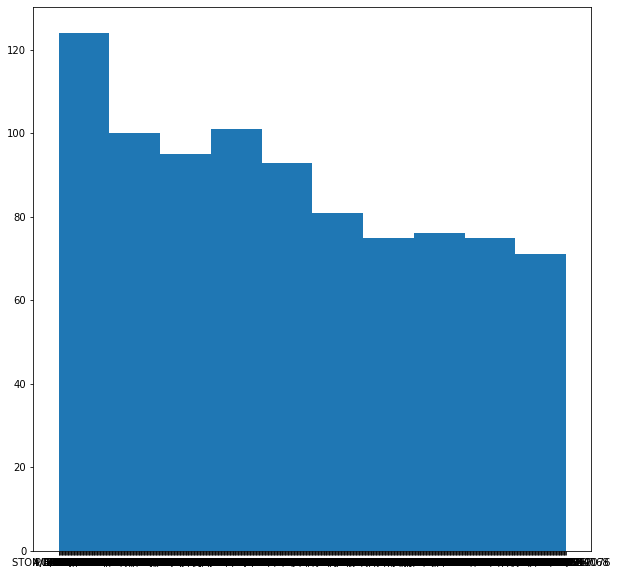

In [28]:
plt.figure(figsize = (10,10))
plt.hist (x='Ticket', data = df)
plt.show()

In [29]:
df.Ticket.unique ()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

# Dropping Name and Ticket features

In [30]:
df = df.drop (columns = ['Name'])
df = df.drop (columns = ['Ticket'])
df.sample(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
277,0,2,male,29.699118,0,0,0.000,S
357,0,2,female,38.000000,0,0,13.000,S
244,0,3,male,30.000000,0,0,7.225,C


# Encoding Sex & Embarked features

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Sex','Embarked']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [32]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
559,1,3,0,36.000000,1,0,17.4000,2
496,1,1,0,54.000000,1,0,78.2667,0
601,0,3,1,29.699118,0,0,7.8958,2
770,0,3,1,24.000000,0,0,9.5000,2
96,0,1,1,71.000000,0,0,34.6542,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


# Checking for unique values in each feature

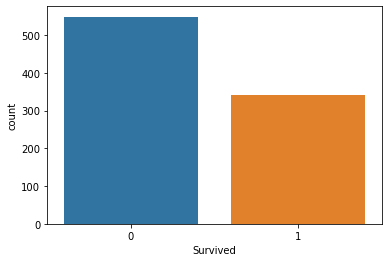

In [34]:
sns.countplot (x='Survived', data = df)
plt.show()

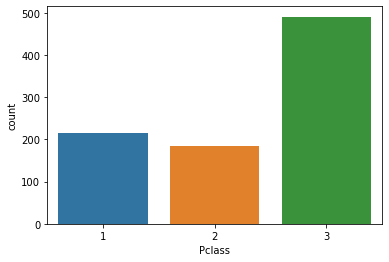

In [35]:
sns.countplot (x='Pclass', data = df)
plt.show()

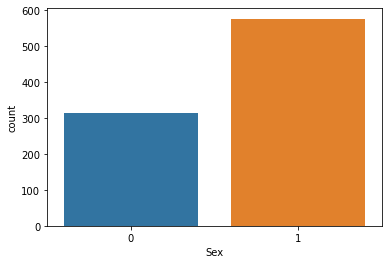

In [36]:
sns.countplot (x='Sex', data = df)
plt.show()

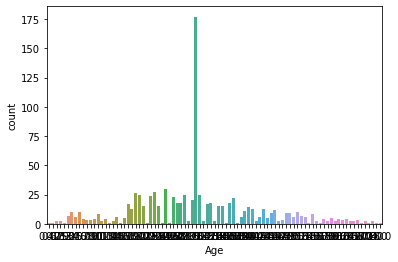

In [37]:
sns.countplot (x='Age', data = df)
plt.show()

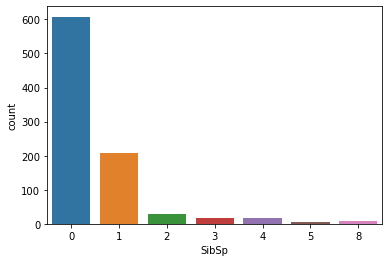

In [38]:
sns.countplot (x='SibSp', data = df)
plt.show()

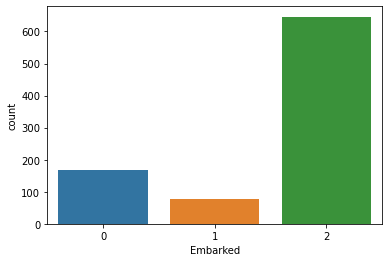

In [39]:
sns.countplot (x='Embarked', data = df)
plt.show()

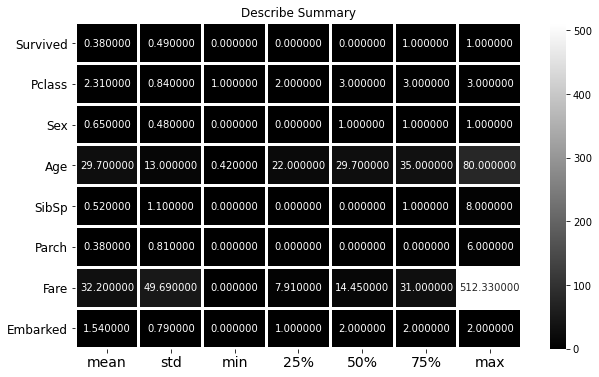

In [40]:
#describing the data visually
plt.figure (figsize = (10,6))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot = True, fmt = 'f',cmap='gray')
plt.xticks(fontsize = 14)
plt.yticks (fontsize = 12)
plt.title ("Describe Summary")
plt.show()

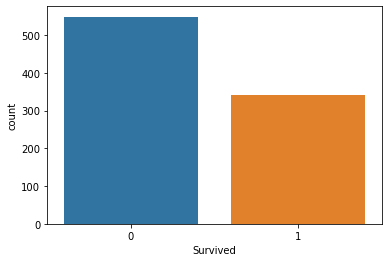

In [41]:
sns.countplot (x='Survived', data = df)
plt.show()

# Checking the Correlation of features

In [42]:
df.corr()['Survived'].abs().sort_values() # taking absoute values

SibSp       0.035322
Age         0.069809
Parch       0.081629
Embarked    0.167675
Fare        0.257307
Pclass      0.338481
Sex         0.543351
Survived    1.000000
Name: Survived, dtype: float64

<AxesSubplot:>

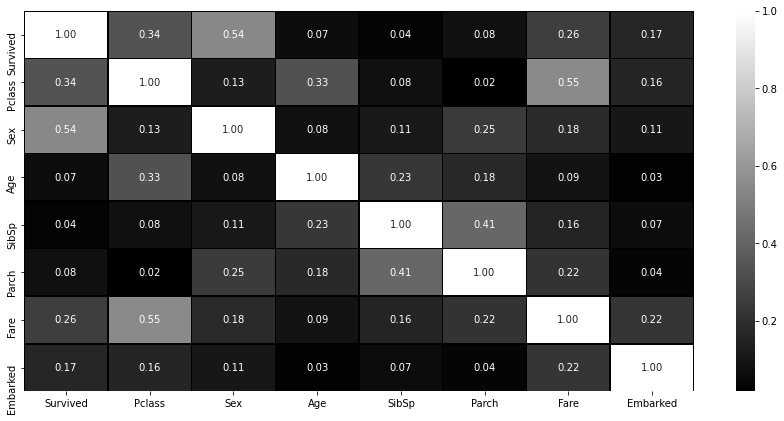

In [43]:
#Using heatmap

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,7))
sns.heatmap(df.corr().abs(), annot = True, linewidths=0.5, linecolor  = "black", fmt='.2f', cmap = 'gray') #upto 2 places of decimals

# Checking for relationship between the features

In [44]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

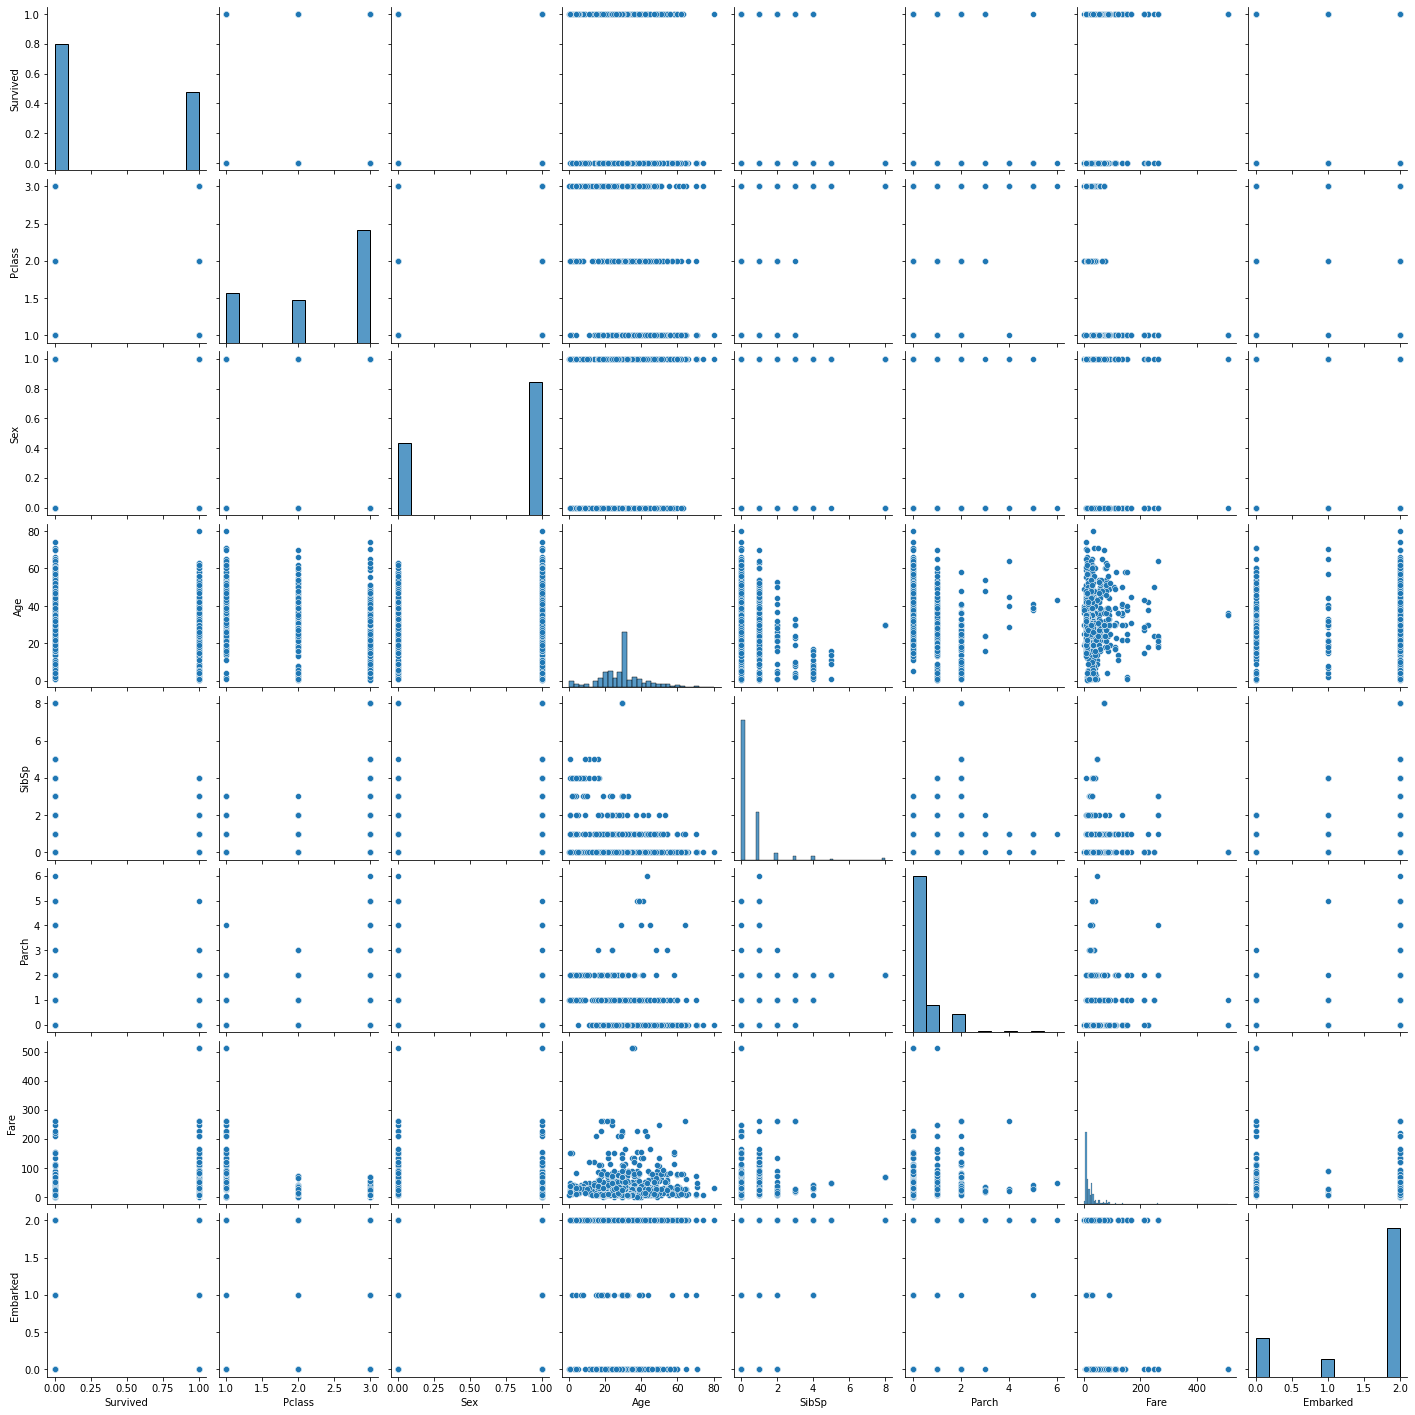

In [45]:
#using pairplots:

import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot (df)
plt.savefig('pairplot.png')
plt.show()

In [48]:
df = df.astype(np.float64) # convert all columns of DataFrame

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

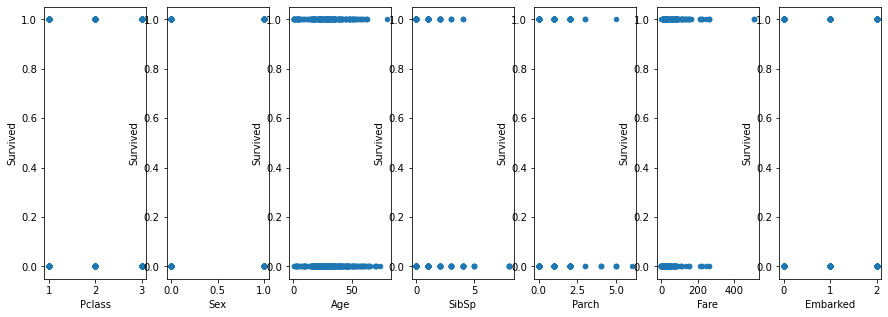

In [52]:
fig, axs = plt.subplots (1,7)
df.plot(kind = 'scatter', x = 'Pclass', y = 'Survived', ax = axs[0], figsize =(15,5))
df.plot(kind = 'scatter', x = 'Sex', y = 'Survived', ax = axs[1])
df.plot(kind = 'scatter', x = 'Age', y = 'Survived', ax = axs[2])
df.plot(kind = 'scatter', x = 'SibSp', y = 'Survived', ax = axs[3])
df.plot(kind = 'scatter', x = 'Parch', y = 'Survived', ax = axs[4])
df.plot(kind = 'scatter', x = 'Fare', y = 'Survived', ax = axs[5])
df.plot(kind = 'scatter', x = 'Embarked', y = 'Survived', ax = axs[6])

# Checking the Distribution

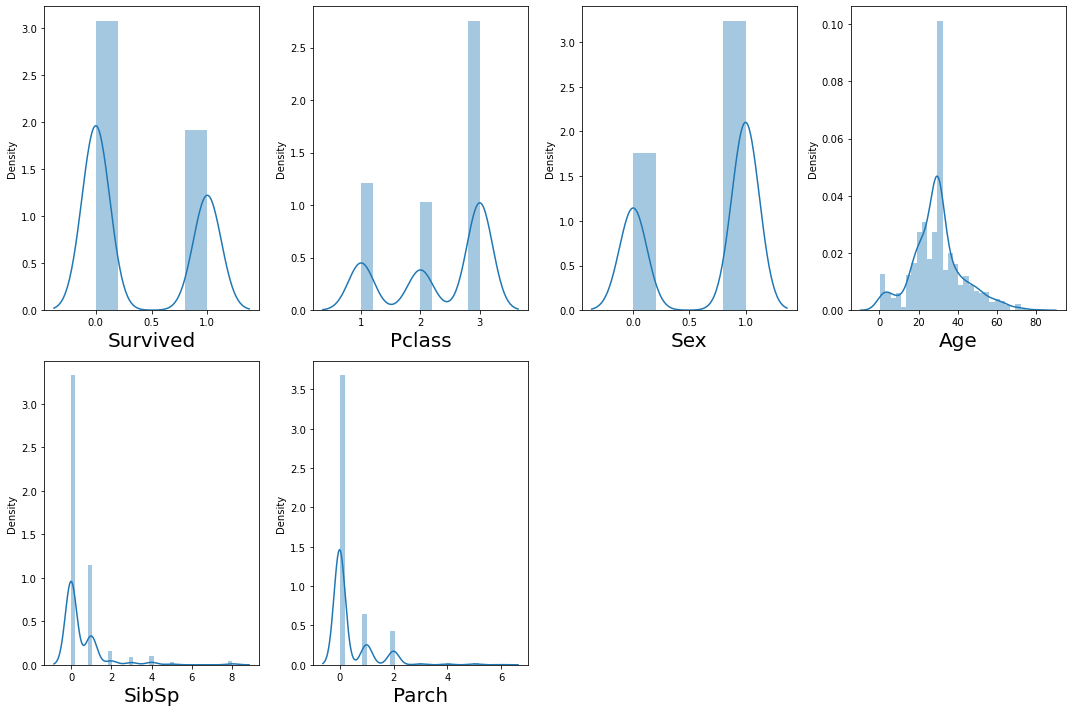

In [54]:
plt.figure(figsize = (15,10), facecolor = 'White')
plotnumber = 1 #this is an initiator

for column in df:
    if plotnumber <7: #here 6 is the number of features
        ax = plt.subplot (2,4, plotnumber)
        sns.distplot (df [column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

# Checking for Outliers

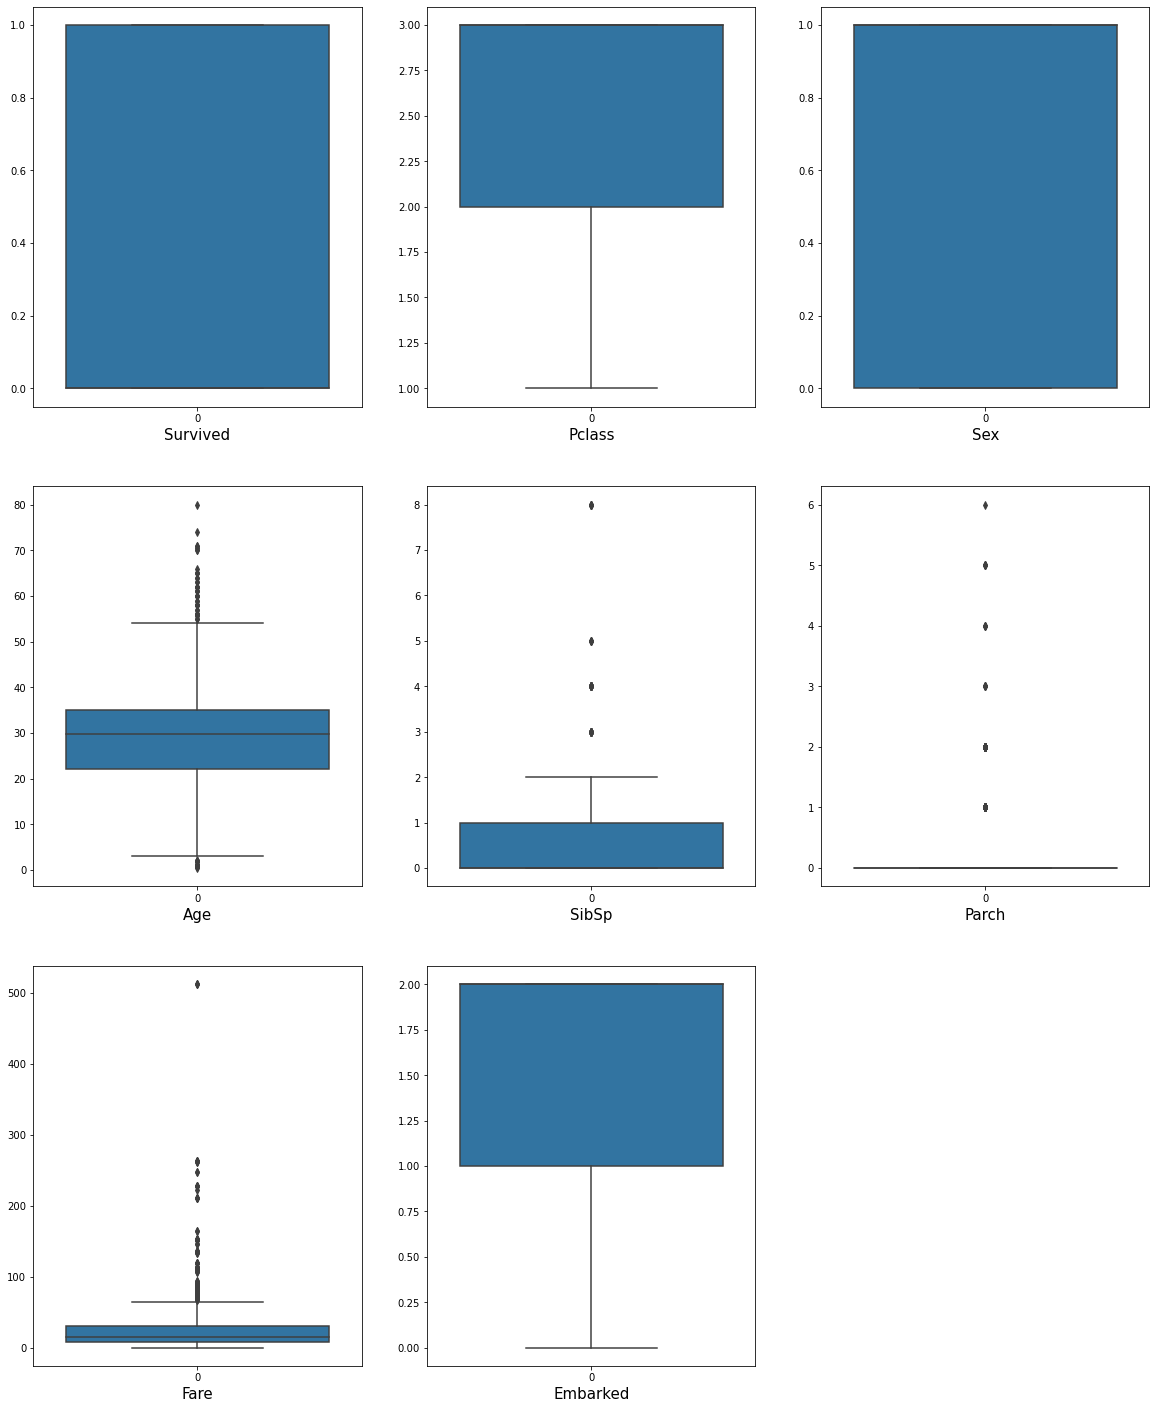

In [55]:
plt.figure (figsize = (20,25))
graph = 1 #Initiator

for column in df:
    if graph <=8: #here 8 is the number of features
        plt.subplot (3,3, graph)
        ax = sns.boxplot (data = df[column])
        plt.xlabel (column, fontsize = 15)
    graph +=1
plt.show()

# Removing Outliers Using ZScore

In [58]:
df.shape

(891, 8)

In [59]:
from scipy.stats import zscore

z_score = zscore (df)
abs_z_score = np.abs(z_score)
filtering_entry = ((abs_z_score < 3).all(axis=1))
df = df[filtering_entry]
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
219,0.0,2.0,1.0,30.0,0.0,0.0,10.500,2.0
600,1.0,2.0,0.0,24.0,2.0,1.0,27.000,2.0
583,0.0,1.0,1.0,36.0,0.0,0.0,40.125,0.0
641,1.0,1.0,0.0,24.0,0.0,0.0,69.300,0.0
231,0.0,3.0,1.0,29.0,0.0,0.0,7.775,2.0


In [60]:
df.shape

(820, 8)

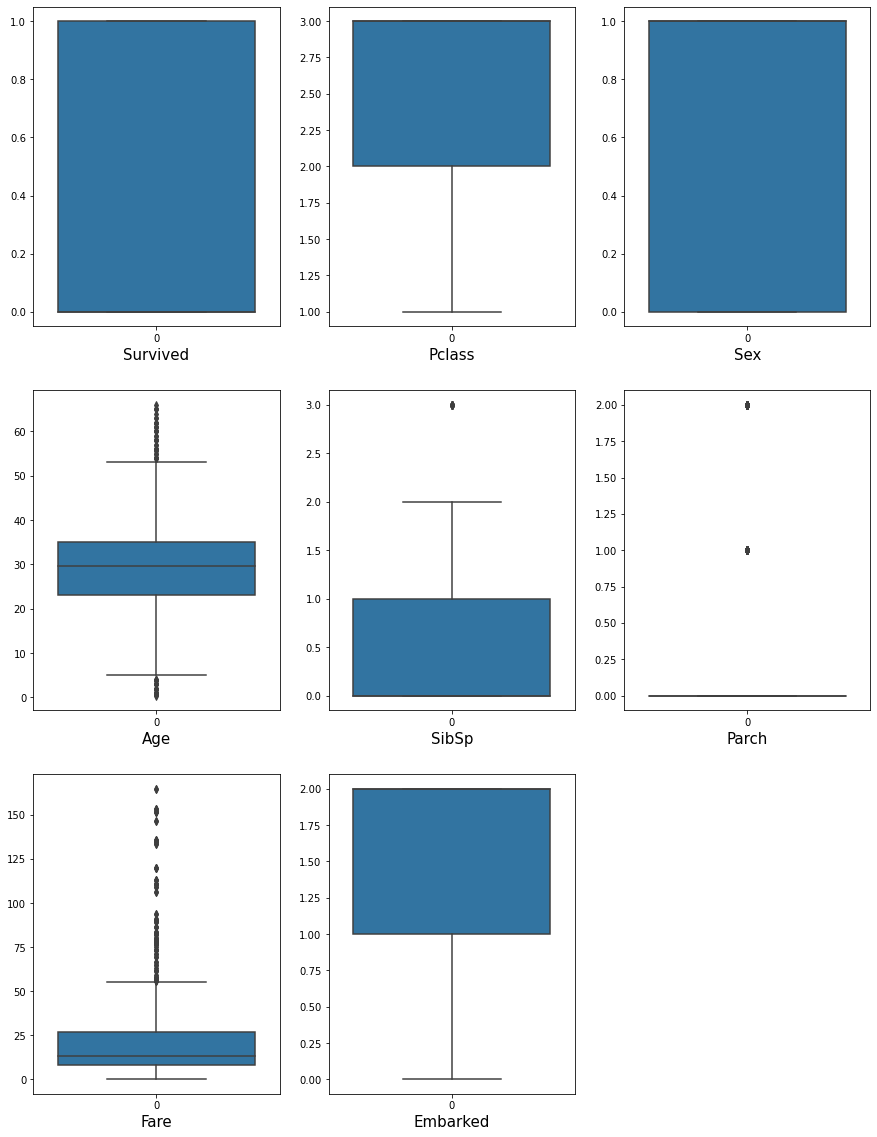

In [63]:
plt.figure (figsize = (15,20))
graph = 1 #Initiator

for column in df:
    if graph <=8: #here 8 is the number of features
        plt.subplot (3,3, graph)
        ax = sns.boxplot (data = df[column])
        plt.xlabel (column, fontsize = 15)
    graph +=1
plt.show()

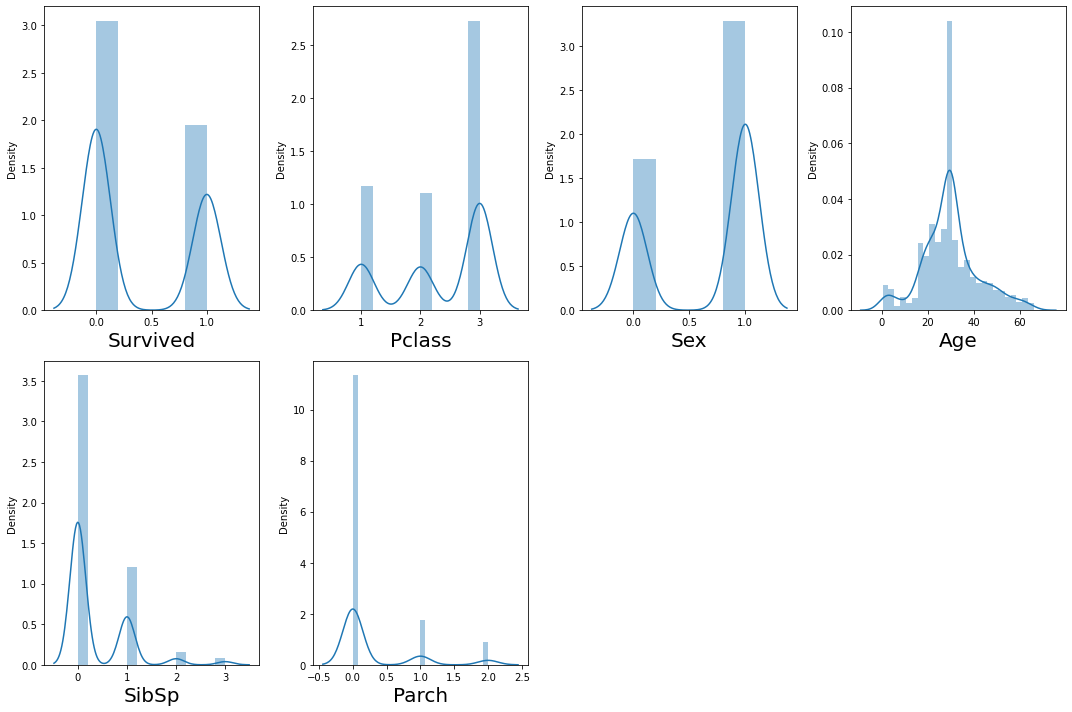

In [64]:
plt.figure(figsize = (15,10), facecolor = 'White')
plotnumber = 1 #this is an initiator

for column in df:
    if plotnumber <7: #here 6 is the number of features
        ax = plt.subplot (2,4, plotnumber)
        sns.distplot (df [column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

In [68]:
#Separating features and label
x1=df.drop('Survived', axis=1)
y1= df.Survived

# Checking Multicollinearity

In [69]:
#Checking for multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor (x1, i) for i in range (x1.shape[1])]
vif["features"] = x1.columns  #here, vif and features are column names
vif

,vif,features
0,6.075940,Pclass
1,3.183474,Sex
2,5.977219,Age
3,1.561938,SibSp
4,1.515971,Parch
5,2.454890,Fare
6,4.615609,Embarked


In [73]:
#Dropping 'Age'
x1 = x1.drop (columns = ['Age'])

In [74]:
#Checking for multicolinearity again

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor (x1, i) for i in range (x1.shape[1])]
vif["features"] = x1.columns  #here, vif and features are column names
vif

,vif,features
0,5.005233,Pclass
1,3.030380,Sex
2,1.548602,SibSp
3,1.443068,Parch
4,1.693372,Fare
5,4.338749,Embarked


In [75]:
x=x1
y=y1

# Using Power Transform for skewness removal

In [76]:
from sklearn.preprocessing import power_transform
x = power_transform(x, method ='yeo-johnson')
print ("Transformation Completed")

Transformation Completed


# Model Building

In [79]:
#Splitting the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [80]:
lr = LogisticRegression()

In [88]:
for i in range (0, 800):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = i)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(accuracy_score(y_train, pred_train)*100,1)  ==  round(accuracy_score(y_test,pred_test)*100,1):
        print ("At random state- ",i)
        print ("Training Accuracy Score is: ", round(accuracy_score(y_train,pred_train)*100,1))
        print ("Testing Accuracy Score is: ", round(accuracy_score(y_test,pred_test)*100,1))
        print ('\n')

At random state-  30
Training Accuracy Score is:  78.5
Testing Accuracy Score is:  78.5


At random state-  35
Training Accuracy Score is:  78.5
Testing Accuracy Score is:  78.5


At random state-  109
Training Accuracy Score is:  78.5
Testing Accuracy Score is:  78.5


At random state-  141
Training Accuracy Score is:  78.5
Testing Accuracy Score is:  78.5


At random state-  296
Training Accuracy Score is:  79.0
Testing Accuracy Score is:  79.0


At random state-  302
Training Accuracy Score is:  78.5
Testing Accuracy Score is:  78.5


At random state-  307
Training Accuracy Score is:  78.0
Testing Accuracy Score is:  78.0


At random state-  346
Training Accuracy Score is:  78.5
Testing Accuracy Score is:  78.5


At random state-  358
Training Accuracy Score is:  78.5
Testing Accuracy Score is:  78.5


At random state-  485
Training Accuracy Score is:  79.0
Testing Accuracy Score is:  79.0


At random state-  515
Training Accuracy Score is:  78.5
Testing Accuracy Score is:  78.5


A

In [87]:
#Actually splitting the data set
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.25, random_state = 603)
y_test.head()

414    1.0
207    1.0
35     0.0
259    1.0
337    1.0
Name: Survived, dtype: float64

# Importing Necessary Classification Algorithms

In [92]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [90]:
#Creating Instances
lg = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()

model = [lg, gnb, svc, dtc, knn, rfc]

# Learning Process

In [98]:
for m in model:
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size= 0.25, random_state=603)
    
    m.fit(x_train, y_train)
    m.fit(x_test, y_test)
    y_pred = m.predict(x_test)
      
    
    
    print(f'*************************{m}*************************')
    
    print ("The training score is: ",(m.score(x_train, y_train))*100) # Training Score
    print ("The testing score is: ",m.score(x_test, y_test)*100) # Training Score
    print ("The Accuracy is: ", accuracy_score(y_test, y_pred)*100)
    print ("The CV score is: ",(cross_val_score(m, x, y, cv=5).mean())*100) #Cross Validation Score taken as 5
    print ("Difference between Accuracy_Score and CV score is: ",((accuracy_score(y_test, y_pred)*100)-((cross_val_score(m, x, y, cv=5).mean())*100)))
    print ('\n')
   
    print("The Confusion Matrix is: \n", confusion_matrix(y_test, y_pred))
    print ('\n')
    
       
    print("Classification Report: \n", classification_report(y_test, y_pred))
    print ("----------------------------------------------------")
    print('\n')

*************************LogisticRegression()*************************
The training score is:  77.39837398373983
The testing score is:  81.95121951219512
The Accuracy is:  81.95121951219512
The CV score is:  78.04878048780489
Difference between Accuracy_Score and CV score is:  3.902439024390233


The Confusion Matrix is: 
 [[117  13]
 [ 24  51]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       130
         1.0       0.80      0.68      0.73        75

    accuracy                           0.82       205
   macro avg       0.81      0.79      0.80       205
weighted avg       0.82      0.82      0.82       205

----------------------------------------------------


*************************GaussianNB()*************************
The training score is:  77.5609756097561
The testing score is:  78.53658536585367
The Accuracy is:  78.53658536585367
The CV score is:  76.34146341463415
Difference between Accurac

### GaussianNB is the best model for this dataset base on above inferences

# AUC ROC Curve

In [104]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

<Figure size 1440x1440 with 0 Axes>

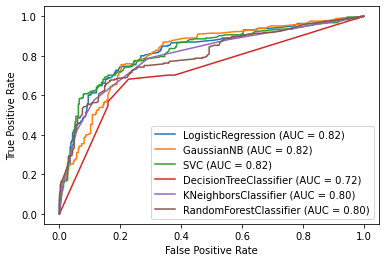

In [114]:
#For Training Data
plt.figure(figsize = (20,20))
disp = plot_roc_curve (lg, x_train, y_train )
plot_roc_curve (gnb, x_train, y_train, ax = disp.ax_)
plot_roc_curve (svc, x_train, y_train, ax = disp.ax_)
plot_roc_curve (dtc, x_train, y_train, ax = disp.ax_)
plot_roc_curve (knn, x_train, y_train, ax = disp.ax_)
plot_roc_curve (rfc, x_train, y_train, ax = disp.ax_)
plt.legend (prop = {'size' : 10}, loc = 'lower right')
plt.show()

In [ ]:
lg = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rfc

<Figure size 1440x1440 with 0 Axes>

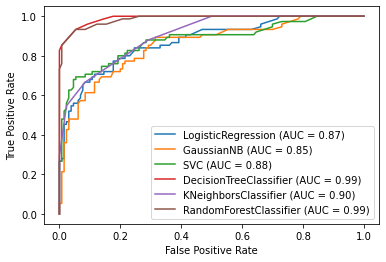

In [115]:
#For Training Data
plt.figure(figsize = (20,20))
disp = plot_roc_curve (lg, x_test, y_test )
plot_roc_curve (gnb, x_test, y_test, ax = disp.ax_)
plot_roc_curve (svc, x_test, y_test, ax = disp.ax_)
plot_roc_curve (dtc, x_test, y_test, ax = disp.ax_)
plot_roc_curve (knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve (rfc, x_test, y_test, ax = disp.ax_)
plt.legend (prop = {'size' : 10}, loc = 'lower right')
plt.show()

# Hyper Parameter Tuning

### Difference between Accuracy_score & CV score is least for GNB

In [101]:
gnb.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

### GNB does not take parameters for tuning, so we will try to tune the second best Algorithm

# Tuning KNN

In [100]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [103]:
from sklearn.model_selection import GridSearchCV

In [116]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

In [117]:
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [118]:
#Creating new KNN object
knn_2 = KNeighborsClassifier()

In [119]:
#Using GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

In [120]:
#Fitting the model
best_model = clf.fit(x,y)

In [121]:
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 20


In [122]:
knn_tuned = KNeighborsClassifier(leaf_size=2, p=2, n_neighbors=20)
knn_tuned.fit(x_train, y_train)
knn_tuned.fit(x_test, y_test)
y_pred = knn_tuned.predict(x_test)
      
    
    
print(f'*************************{m}*************************')
   
print ("The training score is: ",(knn_tuned.score(x_train, y_train))*100) # Training Score
print ("The testing score is: ",knn_tuned.score(x_test, y_test)*100) # Training Score
print ("The Accuracy is: ", accuracy_score(y_test, y_pred)*100)
print ("The CV score is: ",(cross_val_score(knn_tuned, x, y, cv=5).mean())*100) #Cross Validation Score taken as 5
print ("Difference between Accuracy_Score and CV score is: ",((accuracy_score(y_test, y_pred)*100)-((cross_val_score(knn_tuned, x, y, cv=5).mean())*100)))
print ('\n')
  
print("The Confusion Matrix is: \n", confusion_matrix(y_test, y_pred))
print ('\n')
    
       
print("Classification Report: \n", classification_report(y_test, y_pred))
print ("----------------------------------------------------")
print('\n')

*************************RandomForestClassifier()*************************
The training score is:  75.60975609756098
The testing score is:  81.46341463414633
The Accuracy is:  81.46341463414633
The CV score is:  78.41463414634147
Difference between Accuracy_Score and CV score is:  3.048780487804862


The Confusion Matrix is: 
 [[118  12]
 [ 26  49]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       130
         1.0       0.80      0.65      0.72        75

    accuracy                           0.81       205
   macro avg       0.81      0.78      0.79       205
weighted avg       0.81      0.81      0.81       205

----------------------------------------------------




### As a Result of Hyper Parameter Tuning:

### 1. The Difference between Accuracy_Score and CV score has gone down from 4.146 to 3.048
### 2. Confusion matrix has shown improvement
### 3. Similarly Precision, recall & f1 score has also improved

# Saving the tuned Model

In [124]:
import pickle

In [125]:
pickle.dump(knn_tuned, open('Titanic_Classification_project','wb'))

# Original Vs. Predicted

<AxesSubplot:>

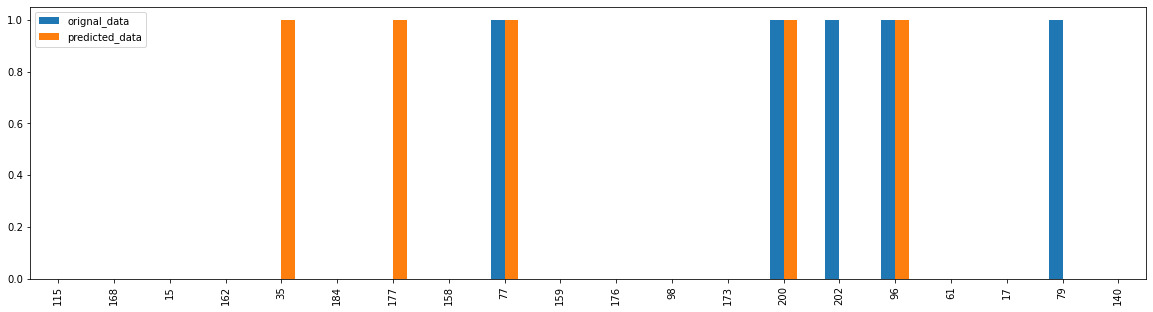

In [132]:
#Randomly Comparing the original data with predicted data using tuned knn model (for 20 sample data)

a = np.array(y_test)
predicted=np.array(knn_tuned.predict(x_test))
df_com=pd.DataFrame({"orignal_data":a,"predicted_data":predicted},index=range(len(a)))
df_com.sample(20).plot(kind = 'bar',figsize = (20,5))

# Thank You